<a href="https://colab.research.google.com/github/piyal-nagda/FMML_PROJECTS_AND_ASSIGNMENTS_PRIYAL/blob/main/FMML_M1L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning terms and metrics

FMML Module 1, Lab 2

In this lab, we will show a part of the ML pipeline by using the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. We will use the scikit-learn library to load the data and perform some basic data preprocessing and model training. We will also show how to evaluate the model using some common metrics, split the data into training and testing sets, and use cross-validation to get a better estimate of the model's performance.

In [3]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=42)

In [4]:
dataset = datasets.fetch_california_housing()
# Dataset description
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Given below are the list of target values. These correspond to the house value derived considering all the 8 input features and are continuous values. We should use regression models to predict these values but we will start with a simple classification model for the sake of simplicity. We need to just round off the values to the nearest integer and use a classification model to predict the house value.

In [5]:
print("Orignal target values:", dataset.target)

dataset.target = dataset.target.astype(int)

print("Target values after conversion:", dataset.target)
print("Input variables shape:", dataset.data.shape)
print("Output variables shape:", dataset.target.shape)

Orignal target values: [4.526 3.585 3.521 ... 0.923 0.847 0.894]
Target values after conversion: [4 3 3 ... 0 0 0]
Input variables shape: (20640, 8)
Output variables shape: (20640,)


The simplest model to use for classification is the K-Nearest Neighbors model. We will use this model to predict the house value with a K value of 1. We will also use the accuracy metric to evaluate the model.

In [6]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [7]:
def RandomClassifier(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the random classifier algorithm

    In reality, we don't need these arguments but we are passing them to keep the function signature consistent with other classifiers

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is a random label from the training data
    """

    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel

We need a metric to evaluate the performance of the model. Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. We will use the accuracy metric to evaluate and compate the performance of the K-Nearest Neighbors model and the random classifier.

In [8]:
def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)

Let us make a function to split the dataset with the desired probability. We will use this function to split the dataset into training and testing sets. We will use the training set to train the model and the testing set to evaluate the model.

In [9]:
def split(data, label, percent):
    # generate a random number for each sample
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent

    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [10]:
testdata, testlabel, alltraindata, alltrainlabel = split(
    dataset.data, dataset.target, 20 / 100
)
print("Number of test samples:", len(testlabel))
print("Number of train samples:", len(alltrainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")

Number of test samples: 4144
Number of train samples: 16496
Percent of test data: 20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [11]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)

What is the accuracy of our classifiers on the train dataset?

In [12]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using nearest neighbour algorithm:", trainAccuracy*100, "%")

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using random classifier: ", trainAccuracy*100, "%")

Training accuracy using nearest neighbour algorithm: 100.0 %
Training accuracy using random classifier:  16.4375808538163 %


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case. This is because the random classifier randomly assigns a label to each sample and the probability of assigning the correct label is 1/(number of classes). Let us predict the labels for our validation set and get the accuracy. This accuracy is a good estimate of the accuracy of our model on unseen data.

In [13]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")


valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.10852713178294 %
Validation accuracy using random classifier: 16.884689922480618 %


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. Now let us try another random split and check the validation accuracy. We will see that the validation accuracy changes with the split. This is because the validation set is small and the accuracy is highly dependent on the samples in the validation set. We can get a better estimate of the accuracy by using cross-validation.

In [14]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.048257372654156 %


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [15]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)

print("Test accuracy:", testAccuracy*100, "%")

Test accuracy: 34.91795366795367 %


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

 1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?


 As the validation percentage increases the random classifier accuracy remains almost same where as the nearest nieghbour accuracy decreases. so when we decrease the validation percentage the accuracy increases . a code to understand :


In [17]:
a= [10,20,30,40,50,60,70,80,90]
axaxis=[]
ayaxis=[]
for x in a:
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, x/100)
  valpred = NN(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  print("Validation accuracy of nearest neighbour is when val is", 100-x ,"percent ", valAccuracy)
  ayaxis.append(valAccuracy)
  axaxis.append(100-x)
print("")
for x in a:
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, x/100)
  valpred = RandomClassifier(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  print("Validation accuracy of random classifier is when val is", 100-x ,"percent ", valAccuracy)



Validation accuracy of nearest neighbour is when val is 90 percent  0.36123076923076924
Validation accuracy of nearest neighbour is when val is 80 percent  0.34057971014492755
Validation accuracy of nearest neighbour is when val is 70 percent  0.35547576301615796
Validation accuracy of nearest neighbour is when val is 60 percent  0.351875
Validation accuracy of nearest neighbour is when val is 50 percent  0.3343483556638246
Validation accuracy of nearest neighbour is when val is 40 percent  0.3582887700534759
Validation accuracy of nearest neighbour is when val is 30 percent  0.3320872274143302
Validation accuracy of nearest neighbour is when val is 20 percent  0.3541540327471195
Validation accuracy of nearest neighbour is when val is 10 percent  0.3616759088108441

Validation accuracy of random classifier is when val is 90 percent  0.15995189416716776
Validation accuracy of random classifier is when val is 80 percent  0.15228113440197288
Validation accuracy of random classifier is whe

2 answer: even thought the train data increases the accuracy remains samewhere as increase in validation data result in decrease of NN accuracy
the test accuracy remains constant even when we alter the train percentagecode for the above:


In [20]:
a= [10,20,30,40,50,60,70,80,90]
for x in a:
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, x/100)
  trainpred = NN(traindata, trainlabel, traindata)
  trainAccuracy = Accuracy(trainlabel, trainpred)
  print("Train accuracy using nearest neighbour is when traindata is" ,x ,"percent  ", trainAccuracy)
  trainpred = RandomClassifier(traindata, trainlabel, traindata)
  trainAccuracy = Accuracy(trainlabel, trainpred)
  print("Train accuracy using random classifier is when traindata is" ,x ,"percent  ", trainAccuracy)
  print("")

Train accuracy using nearest neighbour is when traindata is 10 percent   1.0
Train accuracy using random classifier is when traindata is 10 percent   0.17710843373493976

Train accuracy using nearest neighbour is when traindata is 20 percent   1.0
Train accuracy using random classifier is when traindata is 20 percent   0.16774004683840749

Train accuracy using nearest neighbour is when traindata is 30 percent   1.0
Train accuracy using random classifier is when traindata is 30 percent   0.17168494516450647

Train accuracy using nearest neighbour is when traindata is 40 percent   1.0
Train accuracy using random classifier is when traindata is 40 percent   0.16201959306706856

Train accuracy using nearest neighbour is when traindata is 50 percent   1.0
Train accuracy using random classifier is when traindata is 50 percent   0.16964285714285715

Train accuracy using nearest neighbour is when traindata is 60 percent   1.0
Train accuracy using random classifier is when traindata is 60 perce

In [19]:
a= [10,20,30,40,50,60,70,80,90]
for x in a:
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, x/100)
  valpred = NN(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  print("Validation accuracy of nearest neighbour is when val is", 100-x ,"percent ", valAccuracy)
  testpred = NN(alltraindata, alltrainlabel, testdata)
  testAccuracy = Accuracy(testlabel, testpred)
  print('Test accuracy is ', testAccuracy)
  print("")

Validation accuracy of nearest neighbour is when val is 90 percent  0.2907313784967981
Test accuracy is  0.34917953667953666

Validation accuracy of nearest neighbour is when val is 80 percent  0.3106553655214167
Test accuracy is  0.34917953667953666

Validation accuracy of nearest neighbour is when val is 70 percent  0.31671858774662515
Test accuracy is  0.34917953667953666

Validation accuracy of nearest neighbour is when val is 60 percent  0.32164510913500405
Test accuracy is  0.34917953667953666

Validation accuracy of nearest neighbour is when val is 50 percent  0.3330494037478705
Test accuracy is  0.34917953667953666

Validation accuracy of nearest neighbour is when val is 40 percent  0.324357034795764
Test accuracy is  0.34917953667953666

Validation accuracy of nearest neighbour is when val is 30 percent  0.34146341463414637
Test accuracy is  0.34917953667953666

Validation accuracy of nearest neighbour is when val is 20 percent  0.33230484418389383
Test accuracy is  0.34917953

3.What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?[link text](https://)
3rd answer: since the validation accuracy is constant b/w 20-40 % its better to use 20-40% . the graph related to above:



Text(0.5, 1.0, 'validation graph')

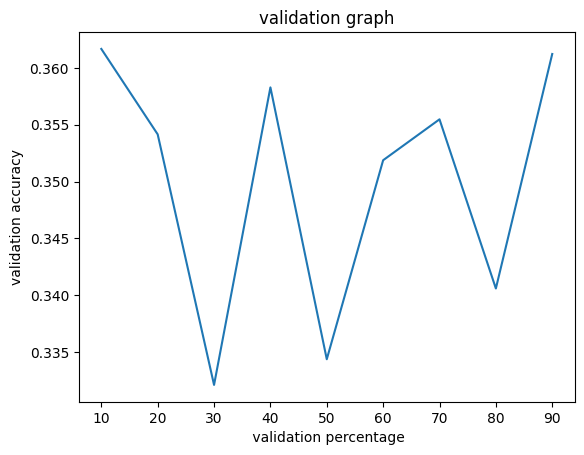

In [21]:
plt.plot(axaxis,ayaxis)
plt.xlabel(" validation percentage")
plt.ylabel("validation accuracy")
plt.title("validation graph")



> Exercise: Try to implement a 3 nearest neighbour classifier and compare the accuracy of the 1 nearest neighbour classifier and the 3 nearest neighbour classifier on the test dataset. You can use the KNeighborsClassifier class from the scikit-learn library to implement the K-Nearest Neighbors model. You can set the number of neighbors using the n_neighbors parameter. You can also use the accuracy_score function from the scikit-learn library to calculate the accuracy of the model.

In [24]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

dataset = datasets.fetch_california_housing()

# print(dataset.DESCR)

X, y = dataset.data, dataset.target

import numpy as np

y = np.digitize(y, bins=np.percentile(y, [33, 66]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)

y_pred_1 = knn_1.predict(X_test)

accuracy_1 = accuracy_score(y_test, y_pred_1)
print(f"Accuracy of 1-Nearest Neighbor: {accuracy_1:.4f}")

knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)

y_pred_3 = knn_3.predict(X_test)

accuracy_3 = accuracy_score(y_test, y_pred_3)
print(f"Accuracy of 3-Nearest Neighbor: {accuracy_3:.4f}")

# Compare the two accuracies
if accuracy_1 > accuracy_3:
    print("1-Nearest Neighbor classifier performs better.")
elif accuracy_3 > accuracy_1:
    print("3-Nearest Neighbor classifier performs better.")
else:
    print("Both classifiers have the same accuracy.")


Accuracy of 1-Nearest Neighbor: 0.6950
Accuracy of 3-Nearest Neighbor: 0.7054
3-Nearest Neighbor classifier performs better.


## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>cross-validation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. You can reduce the number of splits to make it faster.

In [26]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
    """
    This function takes in the data, labels, split percentage, number of iterations and classifier function
    and returns the average accuracy of the classifier

    alldata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    alllabel: numpy array of shape (n,) where n is the number of samples
    splitpercent: float which is the percentage of data to be used for training
    iterations: int which is the number of iterations to run the classifier
    classifier: function which is the classifier function to be used

    returns: the average accuracy of the classifier
    """
    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(
            alldata, alllabel, splitpercent
        )
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations  # average of all accuracies

In [27]:
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, 10, classifier=NN)
print("Average validation accuracy:", avg_acc*100, "%")
testpred = NN(alltraindata, alltrainlabel, testdata)

print("Test accuracy:", Accuracy(testlabel, testpred)*100, "%")

Average validation accuracy: 33.84583046098784 %
Test accuracy: 34.91795366795367 %


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


In [30]:
iterations=[ 5,10,15,20]
byaxis=[]
bxaxis=[]
for x in iterations:
  print('Average validation accuracy for',x,'iteartions is', AverageAccuracy(alltraindata, alltrainlabel, 75/100, x, classifier=NN))
  testpred = NN(alltraindata, alltrainlabel, testdata)
  print('test accuracy for ',x,'iterations is ',Accuracy(testlabel, testpred) )
  byaxis.append(Accuracy(testlabel, testpred))
  bxaxis.append(x)

Average validation accuracy for 5 iteartions is 0.3380066017176258
test accuracy for  5 iterations is  0.34917953667953666
Average validation accuracy for 10 iteartions is 0.34019257947142423
test accuracy for  10 iterations is  0.34917953667953666
Average validation accuracy for 15 iteartions is 0.33866952687891916
test accuracy for  15 iterations is  0.34917953667953666
Average validation accuracy for 20 iteartions is 0.3420008291237199
test accuracy for  20 iterations is  0.34917953667953666


Text(0.5, 1.0, 'accuracies with respect to iterations')

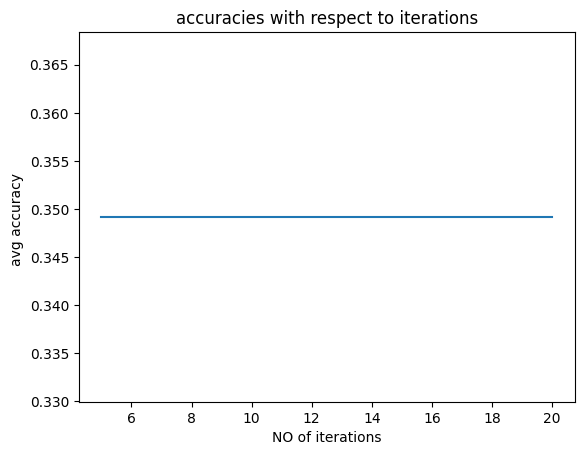

In [31]:
plt.plot(bxaxis,byaxis)
plt.xlabel("NO of iterations")
plt.ylabel("avg accuracy ")
plt.title("accuracies with respect to iterations")

1 answer : As we are averaging the accuracy across multiple splits we get an avg point/value to which any new test accuracy pouint/value will be close with less ammount of difference

2 answer: Since the test data(20%) is completely different from the validation and training data (80(validation+training), 20(test)) .. accuracy of test data remains mostly constant even though on averaging the validation data across multiple splits

3 answer: the more number of iterations the more specific the avg will be. it doesnt mean that the validation avg gets changed drastically on increasing the iterations but there will change in the right most decimal part mostly of the validation accuracy avg value or other words we can say that the avg remains almost same/constant

4 answer : The question is not clear for me so thought of answering in 2 cases . case a: if the answer has to be with respect to test data then small train/validation data set may lead to decrease in accuaracy of test data even we iterate the train and validation data multiple time as we know that the more training given the best the test accuracy will be case b:considering only training data/validation data not the test data. whatever the data set may be small or big .. increasing the iteration leads to improvement of validation accuaracy ( mostly right mostt decimal part ) or simple we can say that the accuracy remains constant

> Exercise: How does the accuracy of the 3 nearest neighbour classifier change with the number of splits? How is it affected by the split size? Compare the results with the 1 nearest neighbour classifier.

Splits: 3
1-NN Accuracy: 0.6851
3-NN Accuracy: 0.7011
------------------------------
Splits: 5
1-NN Accuracy: 0.6886
3-NN Accuracy: 0.7063
------------------------------
Splits: 10
1-NN Accuracy: 0.6892
3-NN Accuracy: 0.7066
------------------------------
Splits: 15
1-NN Accuracy: 0.6900
3-NN Accuracy: 0.7063
------------------------------


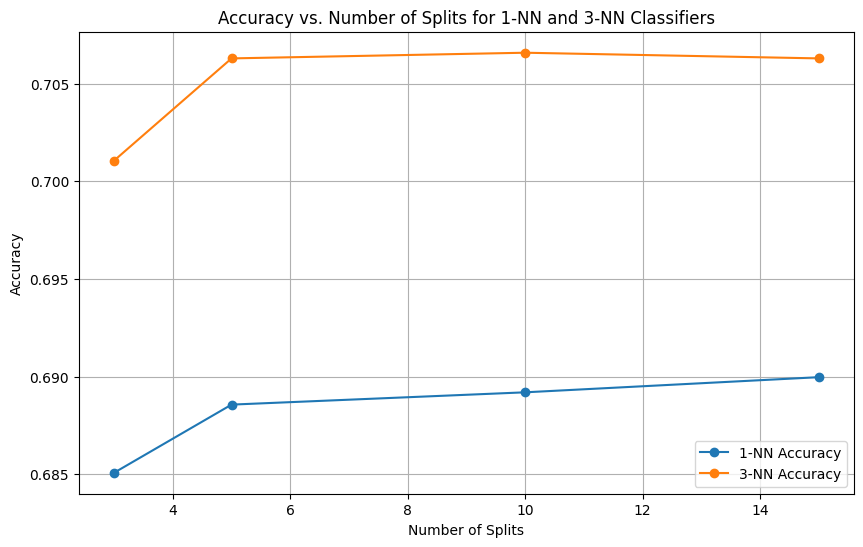

In [32]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Load the California Housing dataset
dataset = datasets.fetch_california_housing()
X, y = dataset.data, dataset.target
y = np.digitize(y, bins=np.percentile(y, [33, 66]))
scaler = StandardScaler()
X = scaler.fit_transform(X)

split_sizes = [3, 5, 10, 15]
accuracies_1nn = []
accuracies_3nn = []

for splits in split_sizes:
    kf = KFold(n_splits=splits, shuffle=True, random_state=42)

    # 1-Nearest Neighbor Classifier
    knn_1 = KNeighborsClassifier(n_neighbors=1)
    scores_1nn = cross_val_score(knn_1, X, y, cv=kf, scoring='accuracy')
    accuracies_1nn.append(np.mean(scores_1nn))

    # 3-Nearest Neighbor Classifier
    knn_3 = KNeighborsClassifier(n_neighbors=3)
    scores_3nn = cross_val_score(knn_3, X, y, cv=kf, scoring='accuracy')
    accuracies_3nn.append(np.mean(scores_3nn))

    print(f"Splits: {splits}")
    print(f"1-NN Accuracy: {np.mean(scores_1nn):.4f}")
    print(f"3-NN Accuracy: {np.mean(scores_3nn):.4f}")
    print("-" * 30)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(split_sizes, accuracies_1nn, marker='o', label='1-NN Accuracy')
plt.plot(split_sizes, accuracies_3nn, marker='o', label='3-NN Accuracy')
plt.xlabel('Number of Splits')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Splits for 1-NN and 3-NN Classifiers')
plt.legend()
plt.grid(True)
plt.show()


Higher Split Sizes (e.g., 12 or 15): Generally lead to more stable accuracy estimates for both 1-NN and 3-NN, with 3-NN often outperforming 1-NN.
Small Split Sizes: May result in more variance in accuracy, especially in smaller datasets.
Overall Performance: The 3-NN classifier tends to perform better in most cases, especially as the number of splits increases, leading to more robust accuracy estimates.